https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
https://www.kaggle.com/isaienkov/data-visualization-modeling-82-acc-75-f1

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
%matplotlib notebook


df_original = pd.read_csv("heart_failure_clinical_records_dataset.csv")


In [2]:
df = df_original
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.shape

(299, 13)

<IPython.core.display.Javascript object>


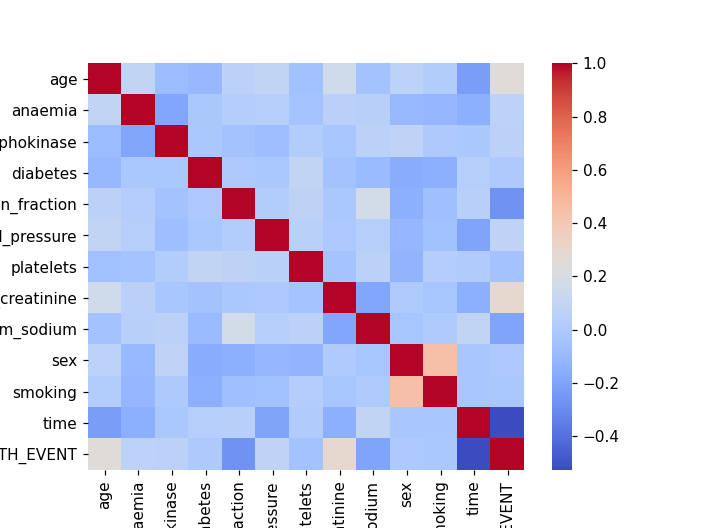

In [5]:
sns.heatmap(df.corr(),cmap='coolwarm')

### Kmeans não normalizado

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
kmeans = KMeans(n_clusters=2,random_state=5)
kmeans.fit(df)
print("Acurácia do kmeans",accuracy_score(df["DEATH_EVENT"],kmeans.labels_))
print("F1 score do kmeans",f1_score(df["DEATH_EVENT"],kmeans.labels_))

Acurácia do kmeans 0.6220735785953178
F1 score do kmeans 0.2981366459627329


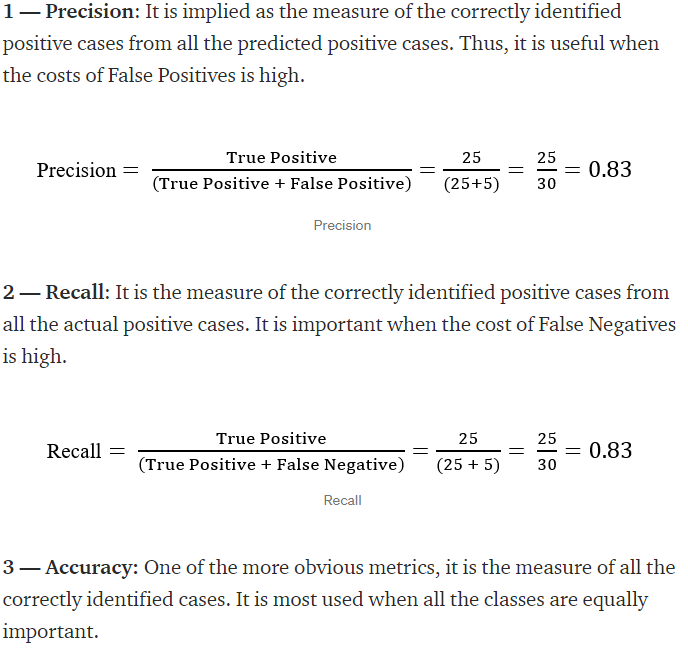
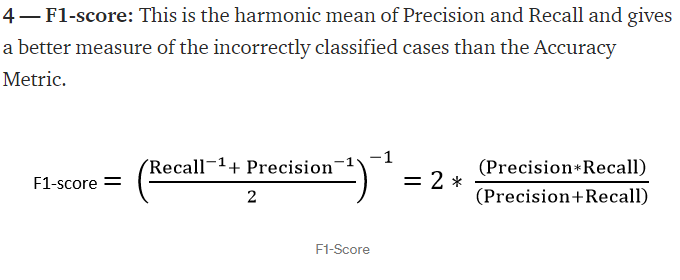

In [7]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(df["DEATH_EVENT"], kmeans.labels_))
print("------------------------------------------------")
conf_mat = confusion_matrix(df["DEATH_EVENT"],kmeans.labels_)
print(conf_mat)

              precision    recall  f1-score   support

           0       0.69      0.80      0.74       203
           1       0.37      0.25      0.30        96

    accuracy                           0.62       299
   macro avg       0.53      0.52      0.52       299
weighted avg       0.59      0.62      0.60       299

------------------------------------------------
[[162  41]
 [ 72  24]]


In [8]:
sum(kmeans.labels_)

65

##### Como podemos observar, o algoritmo teve uma enorme quantidade de falsos positivos e negativos. Isso é comprovado por conta do F1_score

### Agora, vamos tentar normalizar os dados para ver quais serão os resultados

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop("DEATH_EVENT",axis=1))
df[df.columns.drop("DEATH_EVENT")] = scaler.transform(df.drop("DEATH_EVENT",axis=1))

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
kmeans = KMeans(n_clusters=2,random_state=5)
kmeans.fit(df)

KMeans(n_clusters=2, random_state=5)

In [11]:
kmeans.labels_

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1])

In [12]:
print("Acurácia do kmeans",accuracy_score(df["DEATH_EVENT"],kmeans.labels_))
print("F1 score do kmeans",f1_score(df["DEATH_EVENT"],kmeans.labels_))
print("----------------------")
print(classification_report(df["DEATH_EVENT"],kmeans.labels_))
print("----------------------")
print(confusion_matrix(df["DEATH_EVENT"],kmeans.labels_))

Acurácia do kmeans 0.451505016722408
F1 score do kmeans 0.4305555555555556
----------------------
              precision    recall  f1-score   support

           0       0.68      0.36      0.47       203
           1       0.32      0.65      0.43        96

    accuracy                           0.45       299
   macro avg       0.50      0.50      0.45       299
weighted avg       0.57      0.45      0.46       299

----------------------
[[ 73 130]
 [ 34  62]]


Normalizando os dados, obtivemos um f1_score maior, mas uma péssima precisão, pois agora o algoritmo generalizou com maior peso para DEATH_EVENTS, com tendência a classificar como DEATH_EVENT a maior parte dos casos.

In [13]:
df.groupby(df["DEATH_EVENT"]).count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


In [14]:
203/299

0.6789297658862876

### Vamos decompor a quantidade de componentes dos dados, a fim de verificar se realmente não há como agrupá-los em clusters utilizando Kmeans

In [15]:
df = df_original.copy()
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(df.drop("DEATH_EVENT",axis=1))
X_transformed = pca.fit_transform(df.drop("DEATH_EVENT",axis=1))
Y = df["DEATH_EVENT"]
df_transformed = pd.DataFrame(X_transformed)
df_transformed["Y"] = Y
df_transformed.head()

,0,1,2,Y
0,0.877055,2.287104,1.033230,1
1,1.863753,-1.552894,0.719821,1
2,2.526429,1.369821,1.285596,1
3,0.579566,1.143232,0.631174,1
4,-0.960485,2.639384,4.430958,1


In [16]:
df_transformed.columns

Index([0, 1, 2, 'Y'], dtype='object')

<IPython.core.display.Javascript object>


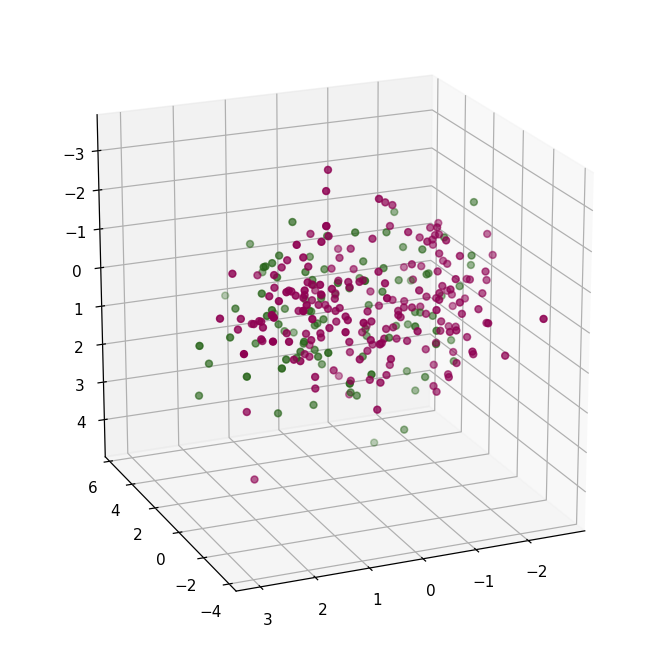

In [27]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.scatter(df_transformed[0],df_transformed[1],df_transformed[2], c=df_transformed["Y"],cmap="PiYG")

#### MLP - Não Normalizado

In [18]:
from sklearn.model_selection import train_test_split
df = df_original
x_train,x_test,y_train,y_test = train_test_split(df.drop("DEATH_EVENT",axis=1),df["DEATH_EVENT"],test_size=0.3)

In [19]:
from sklearn.neural_network import MLPClassifier
mlp_cls = MLPClassifier(solver="lbfgs",alpha=1e-5,hidden_layer_sizes=(5,5),random_state=1)
mlp_cls.fit(x_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 5), random_state=1,
              solver='lbfgs')

In [20]:
predictions_mlp = mlp_cls.predict(x_test)
print("Acurácia do MLP:",accuracy_score(y_test,predictions_mlp))
print("F1 score do MLP:",f1_score(y_test,predictions_mlp))
print("-------------------------")
print(classification_report(y_test,predictions_mlp))
print("-------------------------")
print(confusion_matrix(y_test,predictions_mlp))

Acurácia do MLP: 0.7111111111111111
F1 score do MLP: 0.5666666666666667
-------------------------
              precision    recall  f1-score   support

           0       0.87      0.71      0.78        66
           1       0.47      0.71      0.57        24

    accuracy                           0.71        90
   macro avg       0.67      0.71      0.68        90
weighted avg       0.76      0.71      0.73        90

-------------------------
[[47 19]
 [ 7 17]]


#### Segundo a documentação do Multi-layer Perceptron, ele é um algoritmo que é muito sensível ao escalonamento de features, sendo altamente recomendado que os dados sejam normalizados com média 0 e variância 1 por exemplo

In [21]:
df = df_original.copy()
scaler = StandardScaler()
scaler.fit(df.drop("DEATH_EVENT",axis=1))
df_norm = scaler.transform(df.drop("DEATH_EVENT",axis=1))

In [22]:
x_train,x_test,y_train,y_test = train_test_split(df.drop("DEATH_EVENT",axis=1),df["DEATH_EVENT"],test_size=0.2)

In [23]:
mlp_cls = MLPClassifier(solver="lbfgs",alpha=1e-5,hidden_layer_sizes=(2,2),random_state=1)
mlp_cls.fit(x_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(2, 2), random_state=1,
              solver='lbfgs')

In [24]:
predictions_mlp_train = mlp_cls.predict(x_train)
print("Acurácia do MLP:",accuracy_score(y_train,predictions_mlp_train))
print("F1 score do MLP:",f1_score(y_train,predictions_mlp_train))
print("-------------------------")
print(classification_report(y_train,predictions_mlp_train))
print("-------------------------")
print(confusion_matrix(y_train,predictions_mlp_train))

Acurácia do MLP: 0.8577405857740585
F1 score do MLP: 0.7384615384615384
-------------------------
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       161
           1       0.92      0.62      0.74        78

    accuracy                           0.86       239
   macro avg       0.88      0.80      0.82       239
weighted avg       0.87      0.86      0.85       239

-------------------------
[[157   4]
 [ 30  48]]


In [25]:
predictions = mlp_cls.predict(x_test)

In [26]:
predictions_mlp = mlp_cls.predict(x_test)
print("Acurácia do MLP:",accuracy_score(y_test,predictions_mlp))
print("F1 score do MLP:",f1_score(y_test,predictions_mlp))
print("-------------------------")
print(classification_report(y_test,predictions_mlp))
print("-------------------------")
print(confusion_matrix(y_test,predictions_mlp))

Acurácia do MLP: 0.8333333333333334
F1 score do MLP: 0.6666666666666667
-------------------------
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        42
           1       0.83      0.56      0.67        18

    accuracy                           0.83        60
   macro avg       0.83      0.75      0.78        60
weighted avg       0.83      0.83      0.82        60

-------------------------
[[40  2]
 [ 8 10]]


#### Um ponto negativo de utilizar Redes neurais nesse caso, é que temos uma pequena amostra de dados, tornando esse tipo de abordagem menos eficiente para generalizar casos nunca vistos anteriormente.